In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("NYCB&B.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.shape

(48895, 16)

In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
# Handelling Mising Values

In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
df=df.drop(["host_id","name","host_name","last_review"],axis=1)

In [10]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

In [11]:
df.isnull().sum()

id                                0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

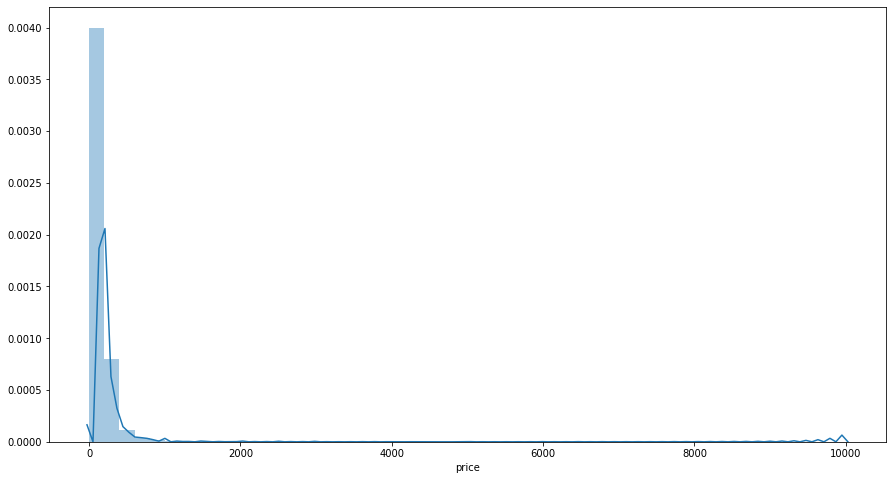

In [12]:
plt.figure(figsize=(15,8))
sns.distplot(df["price"])
plt.show()

In [13]:
# removing outliars 

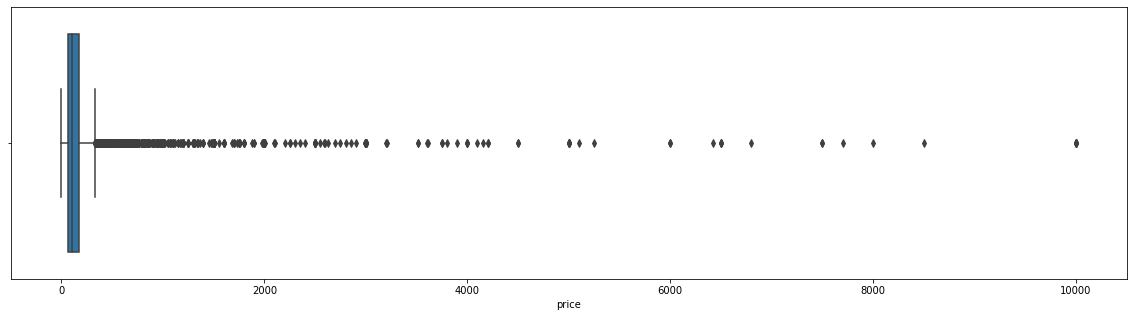

In [14]:
plt.figure(figsize=(20,5))
sns.boxplot(df["price"])
plt.show()

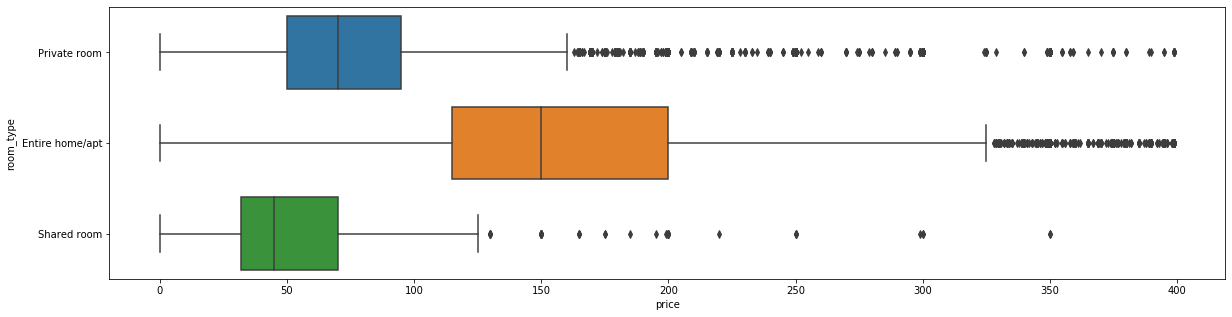

In [81]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x="price",y="room_type")
plt.show()

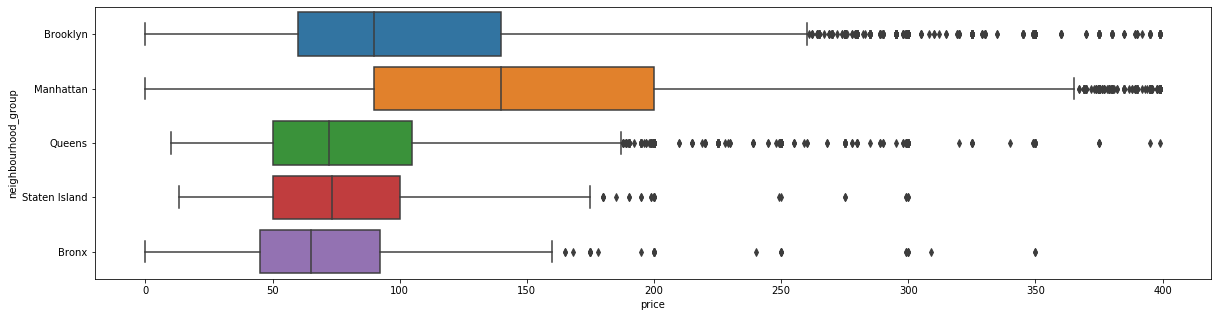

In [82]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x="price",y="neighbourhood_group")
plt.show()

In [17]:
df.shape

(48895, 12)

In [18]:
df.nunique()

id                                48895
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [19]:
def get_whiskers(col):
    q1 = np.quantile(col,0.25)
    q3 = np.quantile(col,0.75)
    iqr = q3-q1
    uw = q3 + 1.5*iqr
    lw = q1 - 1.5*iqr
    return uw,lw

def return_outliers_index(df,col):
    index_list = []
    uw,lw = get_whiskers(df[col])
    for m in df[col]:
        if m > uw:
            index = df.index[df[col] == m].tolist()[0]
            index_list.append(index)
        elif m < lw:
            index = df.index[df[col] == m].tolist()[0]
            index_list.append(index)
        else:
            pass
        
    return index_list

In [20]:
ng = df["neighbourhood_group"].unique().tolist()
ng

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [83]:
for i in ng:
    indexes = return_outliers_index(df[df["neighbourhood_group"]==i],"price")
    df.drop(indexes,inplace=True)

In [22]:
rtype = df["room_type"].unique().tolist()
rtype

['Private room', 'Entire home/apt', 'Shared room']

In [84]:
for i in rtype:
    indexes = return_outliers_index(df[df["room_type"]==i],"price")
    df.drop(indexes,inplace=True)

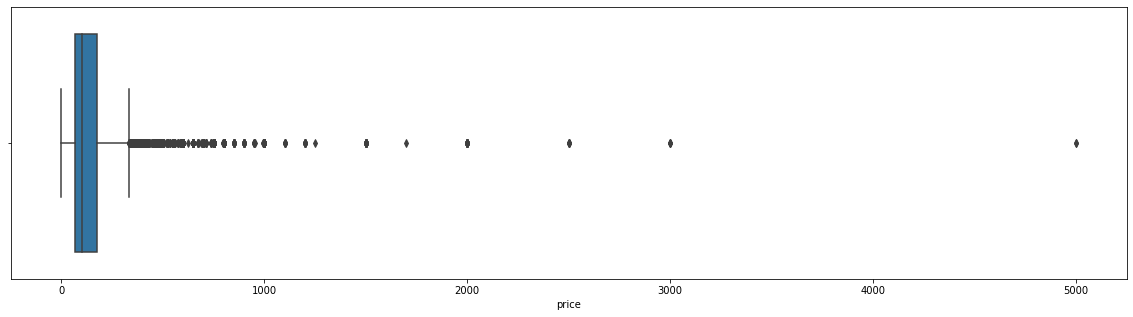

In [24]:
plt.figure(figsize=(20,5))
sns.boxplot(df["price"])
plt.show()

In [25]:
df.shape

(48003, 12)

In [26]:
df = df[(df["price"] < 400)] 

In [27]:
df.shape

(46597, 12)

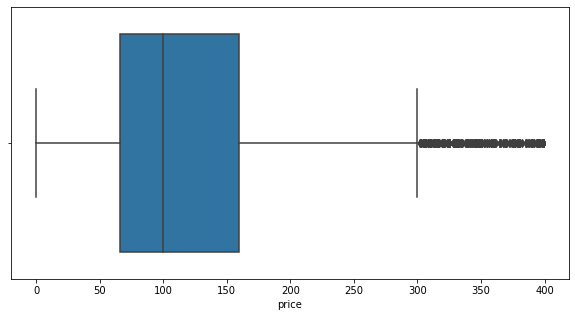

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(df["price"])
plt.show()

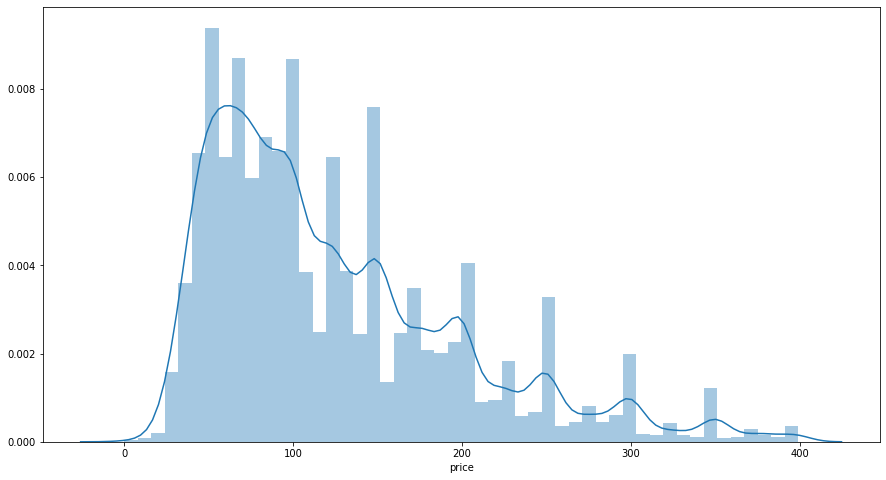

In [29]:
plt.figure(figsize=(15,8))
sns.distplot(df["price"])
plt.show()

In [30]:
# Handelling Categorical dATA

In [31]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["float64","int64"])

In [32]:
df_cat.head()

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt


In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [35]:
df_cat.head()

,neighbourhood_group,neighbourhood,room_type
0,1,107,1
1,2,126,0
2,2,93,1
3,1,41,0
4,2,61,0


In [36]:
#Skewness

In [37]:
df_num.head()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,40.64749,-73.97237,149,1,9,0.21,6,365
1,2595,40.75362,-73.98377,225,1,45,0.38,2,355
2,3647,40.80902,-73.94190,150,3,0,0.00,1,365
3,3831,40.68514,-73.95976,89,1,270,4.64,1,194
4,5022,40.79851,-73.94399,80,10,9,0.10,1,0


In [39]:
df_num=df_num.drop(["id"],axis=1)

In [40]:
df_num.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,0.00,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


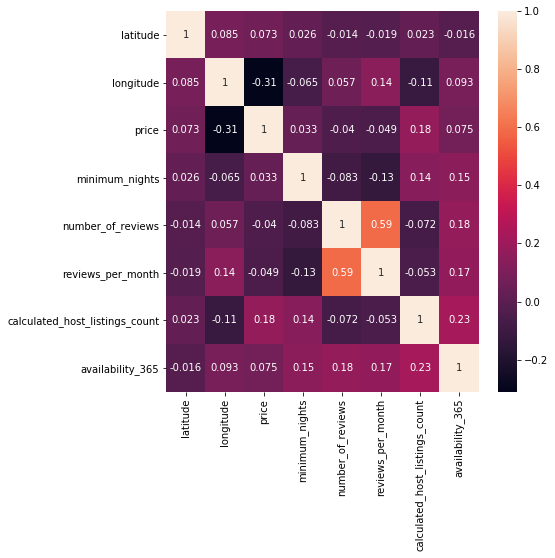

In [41]:
plt.figure(figsize=(7,7))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

In [42]:
from scipy.stats import skew

latitude
0.25600955316231355


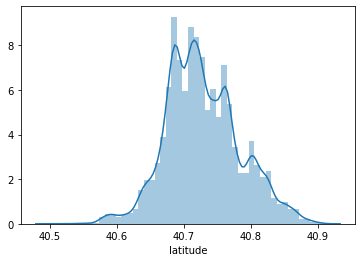

longitude
1.2702833179618707


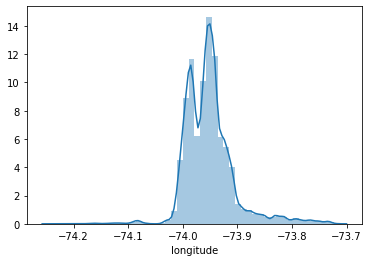

price
1.1587420927860967


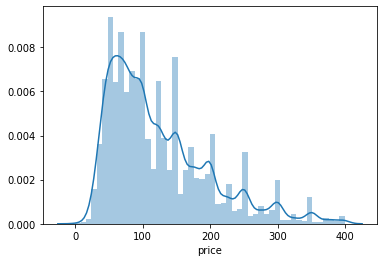

minimum_nights
21.665404477217923


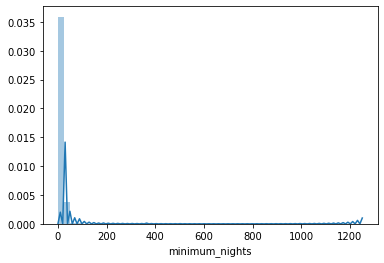

number_of_reviews
3.647795142503013


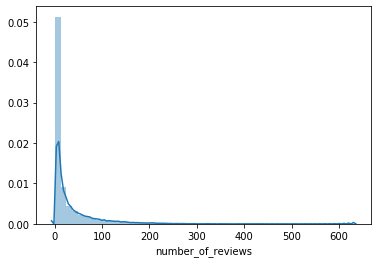

reviews_per_month
3.3123635170191323


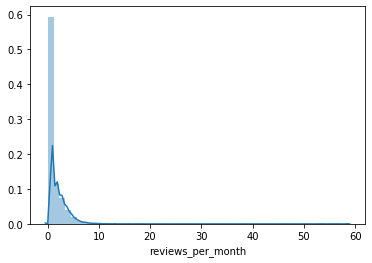

calculated_host_listings_count
8.128111696538014


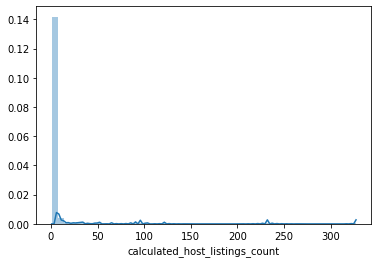

availability_365
0.8037114801210391


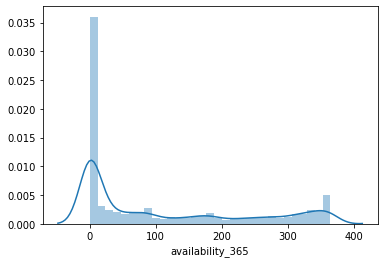

In [43]:
for col in df_num:
    print(col)
    print(skew(df_num[col]))
    
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()

In [44]:
#Scaling

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
mm = MinMaxScaler()

In [47]:
for col in df_num:
    mm = MinMaxScaler()
    df_num[col] = mm.fit_transform(df_num[[col]])

In [48]:
df_num.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.357393,0.511921,0.373434,0.000000,0.014308,0.003590,0.015337,1.000000
1,0.614199,0.490469,0.563910,0.000000,0.071542,0.006496,0.003067,0.972603
2,0.748252,0.569257,0.375940,0.001601,0.000000,0.000000,0.000000,1.000000
3,0.448496,0.535649,0.223058,0.000000,0.429253,0.079316,0.000000,0.531507
4,0.722820,0.565324,0.200501,0.007206,0.014308,0.001709,0.000000,0.000000


In [49]:
# combining the categorical and numeric columns

In [50]:
df_new = pd.concat([df_num,df_cat],axis=1)

In [51]:
df_new.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,0.357393,0.511921,0.373434,0.000000,0.014308,0.003590,0.015337,1.000000,1,107,1
1,0.614199,0.490469,0.563910,0.000000,0.071542,0.006496,0.003067,0.972603,2,126,0
2,0.748252,0.569257,0.375940,0.001601,0.000000,0.000000,0.000000,1.000000,2,93,1
3,0.448496,0.535649,0.223058,0.000000,0.429253,0.079316,0.000000,0.531507,1,41,0
4,0.722820,0.565324,0.200501,0.007206,0.014308,0.001709,0.000000,0.000000,2,61,0


In [52]:
df.shape

(46597, 12)

In [53]:
cor=df_new.corr()
cor

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
latitude,1.000000,0.085142,0.072628,0.026275,-0.013651,-0.018809,0.022803,-0.015650,0.282406,0.234286,0.008425
longitude,0.085142,1.000000,-0.310471,-0.064985,0.056688,0.141092,-0.111149,0.092882,0.111697,-0.098945,0.179957
price,0.072628,-0.310471,1.000000,0.033228,-0.039951,-0.048887,0.177088,0.074777,0.074722,0.128111,-0.596356
minimum_nights,0.026275,-0.064985,0.033228,1.000000,-0.082610,-0.128312,0.137633,0.149001,0.016518,0.029051,-0.073938
number_of_reviews,-0.013651,0.056688,-0.039951,-0.082610,1.000000,0.592192,-0.072346,0.180277,0.006518,-0.036824,-0.001682
reviews_per_month,-0.018809,0.141092,-0.048887,-0.128312,0.592192,1.000000,-0.053049,0.170051,0.055901,-0.050492,0.026340
calculated_host_listings_count,0.022803,-0.111149,0.177088,0.137633,-0.072346,-0.053049,1.000000,0.229170,0.073653,0.013134,-0.107686
availability_365,-0.015650,0.092882,0.074777,0.149001,0.180277,0.170051,0.229170,1.000000,0.078547,-0.039624,0.036236
neighbourhood_group,0.282406,0.111697,0.074722,0.016518,0.006518,0.055901,0.073653,0.078547,1.000000,0.112179,-0.012099
neighbourhood,0.234286,-0.098945,0.128111,0.029051,-0.036824,-0.050492,0.013134,-0.039624,0.112179,1.000000,-0.068052


In [ ]:
# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

In [65]:
X = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [67]:
def create_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    return model

In [68]:
lr = LogisticRegression()
create_model(lr)

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      7085
           1       0.76      0.85      0.80      6579
           2       0.00      0.00      0.00       316

    accuracy                           0.80     13980
   macro avg       0.53      0.55      0.54     13980
weighted avg       0.78      0.80      0.79     13980



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
dt = DecisionTreeClassifier()
dt = create_model(dt)

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      7085
           1       0.78      0.77      0.77      6579
           2       0.33      0.37      0.35       316

    accuracy                           0.78     13980
   macro avg       0.64      0.65      0.65     13980
weighted avg       0.78      0.78      0.78     13980



In [70]:
dt.score(X_train,y_train)

1.0

In [71]:
dt.feature_importances_

array([0.11009506, 0.10672903, 0.49056157, 0.05400233, 0.04171121,
       0.05757929, 0.03761187, 0.06467689, 0.00449808, 0.03253468])

In [72]:
dt2 = DecisionTreeClassifier(max_depth=8)
create_model(dt2)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7085
           1       0.82      0.84      0.83      6579
           2       0.72      0.25      0.37       316

    accuracy                           0.84     13980
   macro avg       0.80      0.65      0.69     13980
weighted avg       0.84      0.84      0.84     13980



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [73]:
dt3 = DecisionTreeClassifier(min_samples_leaf=50)
dt3 = create_model(dt3)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      7085
           1       0.83      0.82      0.83      6579
           2       0.63      0.23      0.34       316

    accuracy                           0.84     13980
   macro avg       0.77      0.65      0.68     13980
weighted avg       0.83      0.84      0.83     13980



In [74]:
dt4 = DecisionTreeClassifier(min_samples_leaf=50,criterion="entropy")
dt4 = create_model(dt4)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      7085
           1       0.84      0.81      0.82      6579
           2       0.63      0.28      0.39       316

    accuracy                           0.84     13980
   macro avg       0.77      0.66      0.69     13980
weighted avg       0.83      0.84      0.83     13980



In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
m1 = cross_val_score(dt3,X,y,cv=4)
m1

array([0.83004292, 0.83620912, 0.82504936, 0.83397717])

In [77]:
m1.mean()

0.83131964024984

In [78]:
m2 = cross_val_score(dt4,X,y,cv=4)
m2

array([0.82291845, 0.83286119, 0.83277535, 0.83165937])

In [79]:
m2.mean()

0.8300535900408847